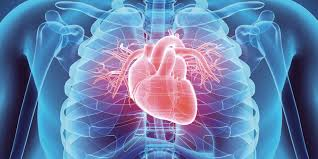 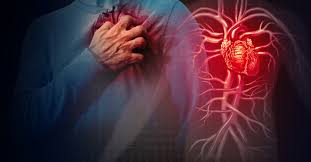  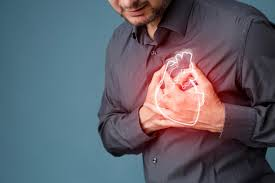

<div style="background-color: #D7D3BF; padding: 20px; border-radius: 10px;">
    <h2 style="color: #ffffff;">Heart Diseases and Their Analysis Using Artificial Intelligence ❤️🤖</h2>
    <p style="color: #000000;">Heart diseases are among the leading causes of death worldwide, posing a significant health challenge for individuals and societies. With the rapid technological advancements in artificial intelligence and machine learning, it has become possible to leverage these modern technologies to provide innovative solutions for analyzing medical data and predicting the risks of heart diseases. 🏥📊</p>
    <p style="color: #000000;">Artificial intelligence helps deliver accurate insights by analyzing various risk factors, such as age, gender, blood pressure, and lifestyle. This not only aids in the early detection of critical cases but also opens the door to improving treatment and prevention plans, ultimately reducing mortality rates. ⏳🔍</p>
    <p style="color: #000000;">We will explore the analysis of heart disease data using AI techniques to develop reliable predictive models that can enhance medical decision-making. We will review the data, understand the different patterns, and train predictive models to contribute to better healthcare outcomes. 💡📈</p>
</div>



In [184]:
# Data analsis
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import  warnings 
warnings.filterwarnings('ignore')

# Data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Data moduling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [2]:
df = pd.read_csv('heart.csv')

# Explore Data


In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape

(918, 12)

In [5]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [6]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(918, 12)

<Axes: >

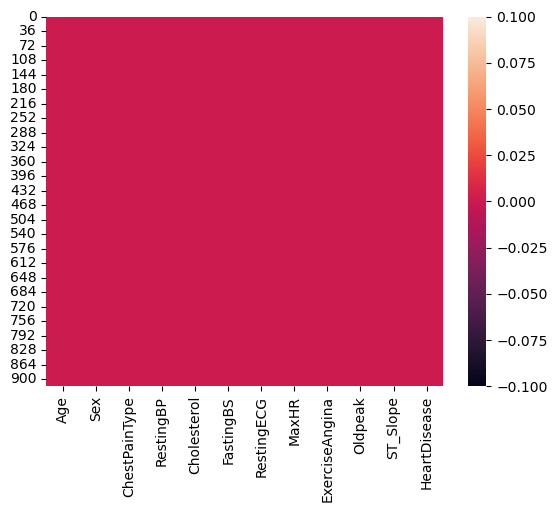

In [10]:
sns.heatmap(df.isna())

In [11]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Data Analysis

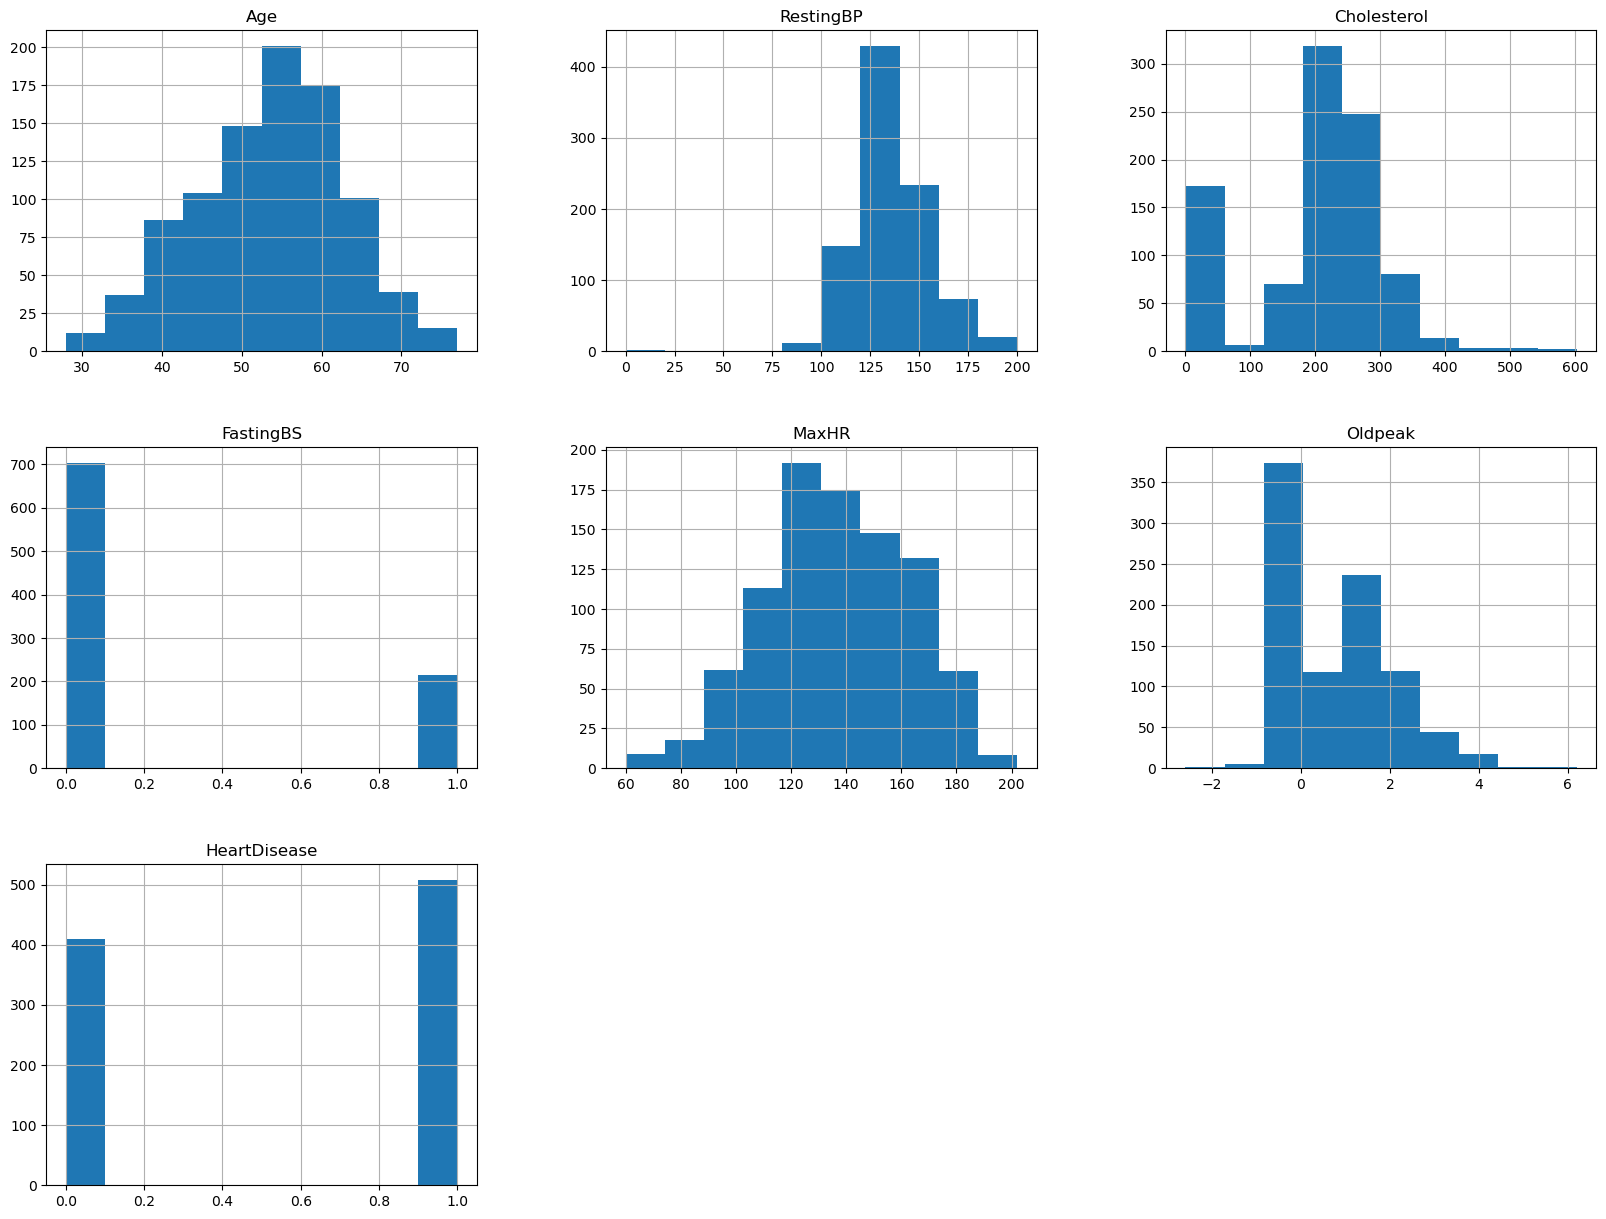

In [12]:
df.hist(figsize=(20,15))
plt.show()

# Age

In [13]:
df['Age'].unique()

array([40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51,
       56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61,
       29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75, 76, 71])

# Sex

In [14]:
Sex_pie = df['Sex'].value_counts()

In [15]:
Sex_pie

Sex
M    725
F    193
Name: count, dtype: int64

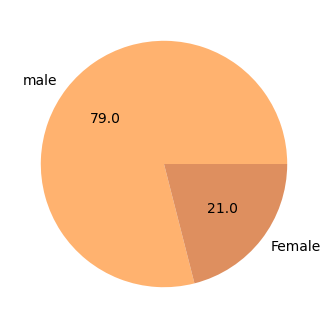

In [16]:
plt.figure(figsize=(4,4))
colors = ['#FFB26F','#DE8F5F','#FFCF9D','#FFB38E']
plt.pie(Sex_pie, colors=colors, 
       frame=False,autopct='%1.1f',labels=['male','Female'])



plt.show()

### Sex Relationship with ChestPainType

In [17]:

def plot_cont(x,hue): 
    ax = sns.countplot(x=x, hue=hue, palette='coolwarm')
    for bars in ax.containers: 
        ax.bar_label(bars)
    plt.show()
def bar_plot(x,y):
    sns.barplot(x=x,y=y,palette="colors")
    for bars in ax.containers: 
        ax.bar_label(bars)
    plt.show()

In [18]:
Sex_Relationship_ChestPainType = df.pivot_table(
    index='Sex',
    columns='ChestPainType',
    aggfunc =  'size',
    fill_value=0,)
Sex_Relationship_ChestPainType

ChestPainType,ASY,ATA,NAP,TA
Sex,,,,
F,70,60,53,10
M,426,113,150,36


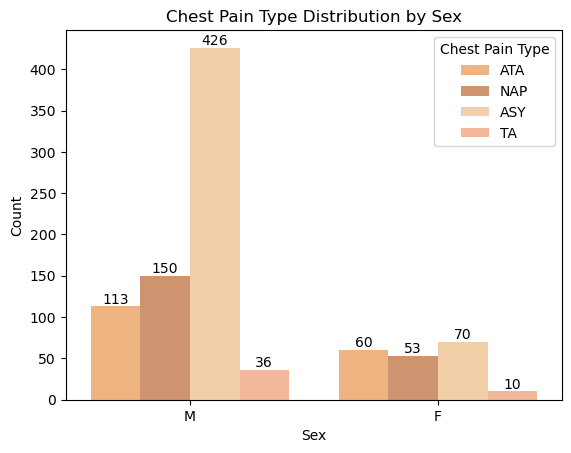

In [19]:
ax = sns.countplot(x='Sex',hue='ChestPainType',data=df , palette=colors)
for bar in ax.containers: 
    ax.bar_label(bar)

plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Chest Pain Type Distribution by Sex")
plt.legend(title="Chest Pain Type")
plt.show()

### Sex Relationship with FastingBS

In [20]:
Sex_Relationship_FastingBS = df.groupby(['Sex', 'FastingBS']).size().reset_index(name='Count')
Sex_Relationship_FastingBS


,Sex,FastingBS,Count
0,F,0,167
1,F,1,26
2,M,0,537
3,M,1,188


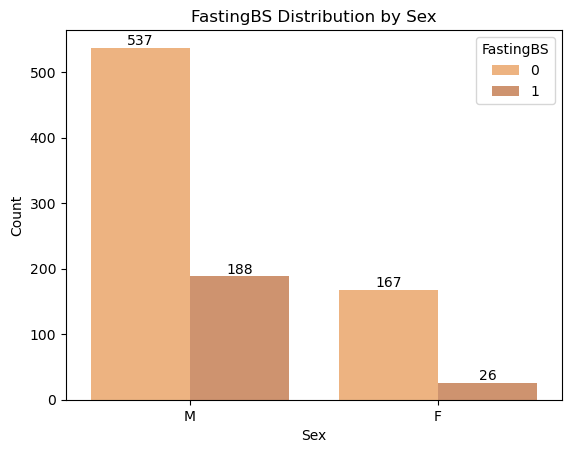

In [21]:
ax = sns.countplot(x='Sex',hue='FastingBS',data=df , palette=colors)
for bar in ax.containers: 
    ax.bar_label(bar)

plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("FastingBS Distribution by Sex")
plt.legend(title="FastingBS")
plt.show()

### Sex Relationship with RestingECG

In [22]:
Sex_Relationship_RestingECG = df.pivot_table(
    index='Sex',
    columns='RestingECG',
    aggfunc= 'size',
    fill_value=0,
)
Sex_Relationship_RestingECG

RestingECG,LVH,Normal,ST
Sex,,,
F,47,118,28
M,141,434,150


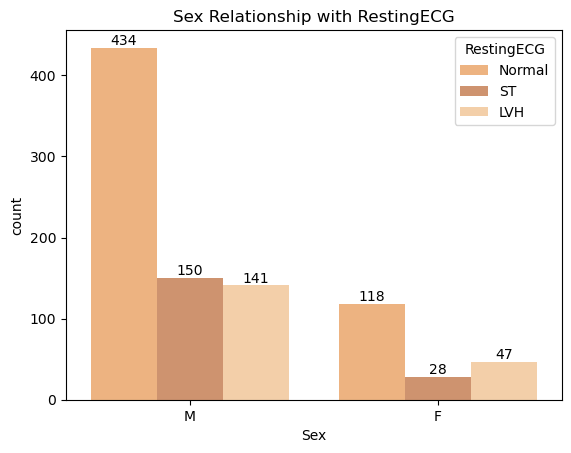

In [23]:
ax= sns.countplot(x='Sex',hue='RestingECG',data=df,palette=colors)
for bar in ax.containers: 
    ax.bar_label(bar)
plt.xlabel('Sex')
plt.ylabel('count')
plt.title('Sex Relationship with RestingECG')
plt.show()

### Sex Relationship with ExerciseAngina

In [24]:
Sex_Relationship_ExerciseAngina = df.groupby(['Sex','ExerciseAngina']).size().sort_values(ascending=True).reset_index(name='Count')
                        
Sex_Relationship_ExerciseAngina

,Sex,ExerciseAngina,Count
0,F,Y,43
1,F,N,150
2,M,Y,328
3,M,N,397


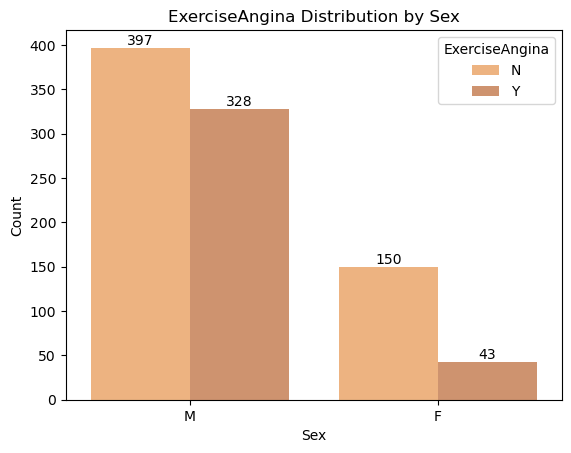

In [25]:
ax = sns.countplot(x='Sex',hue='ExerciseAngina',data=df , palette=colors)
for bar in ax.containers: 
    ax.bar_label(bar)

plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("ExerciseAngina Distribution by Sex")
plt.legend(title="ExerciseAngina")
plt.show()

### Sex Relationship with ST_Slope

In [26]:
Sex_Relationship_ST_Slope = df.pivot_table(index='Sex',
    columns='ST_Slope',
    aggfunc ='size',
    fill_value=0,)
                        
Sex_Relationship_ST_Slope


ST_Slope,Down,Flat,Up
Sex,,,
F,7,75,111
M,56,385,284


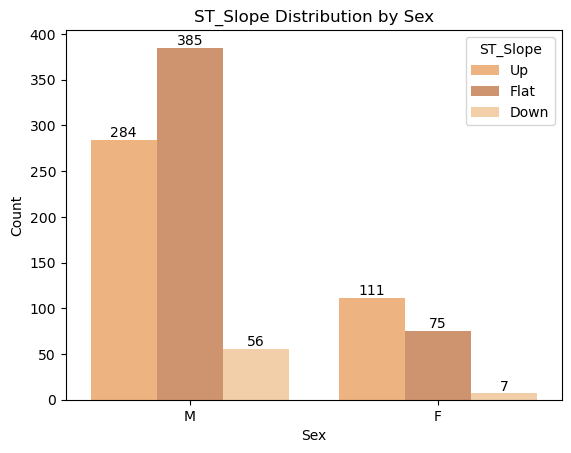

In [27]:
ax = sns.countplot(x='Sex',hue='ST_Slope',data=df , palette=colors)
for bar in ax.containers: 
    ax.bar_label(bar)

plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("ST_Slope Distribution by Sex")
plt.legend(title="ST_Slope")
plt.show()

# ChestPainType 

In [28]:
ChestPainType_bar = df['ChestPainType'].value_counts()
ChestPainType_bar

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

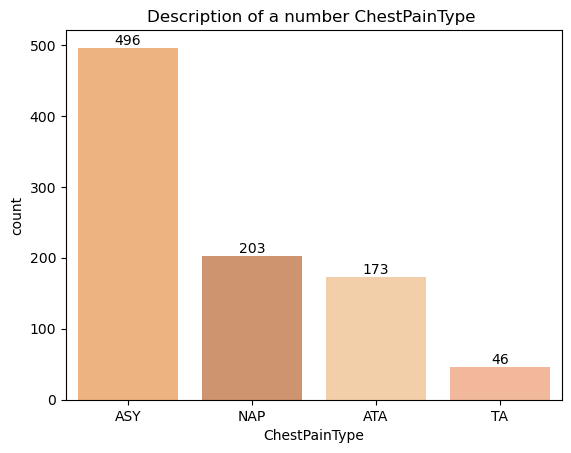

In [29]:
ax = sns.barplot(x=ChestPainType_bar.index,y=ChestPainType_bar.values,palette=colors)
for bar in ax.containers: 
    ax.bar_label(bar)
plt.xlabel('ChestPainType')
plt.ylabel('count')
plt.title('Description of a number ChestPainType ')
plt.show()

In [30]:
df.groupby(['ChestPainType'])['Sex'].value_counts().idxmax()


('ASY', 'M')

In [31]:
df[(df['ChestPainType'] == 'ASY') & (df['Age'] > 50)]


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
18,60,M,ASY,100,248,0,Normal,125,N,1.0,Flat,1
26,53,M,ASY,124,260,0,ST,112,Y,3.0,Flat,0
32,54,M,ASY,125,224,0,Normal,122,N,2.0,Flat,1
36,65,M,ASY,140,306,1,Normal,87,Y,1.5,Flat,1
54,52,F,ASY,130,180,0,Normal,140,Y,1.5,Flat,0
...,...,...,...,...,...,...,...,...,...,...,...,...
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1


# FastingBS

In [32]:
FastingBS_bar = df['FastingBS'].value_counts()
FastingBS_bar

FastingBS
0    704
1    214
Name: count, dtype: int64

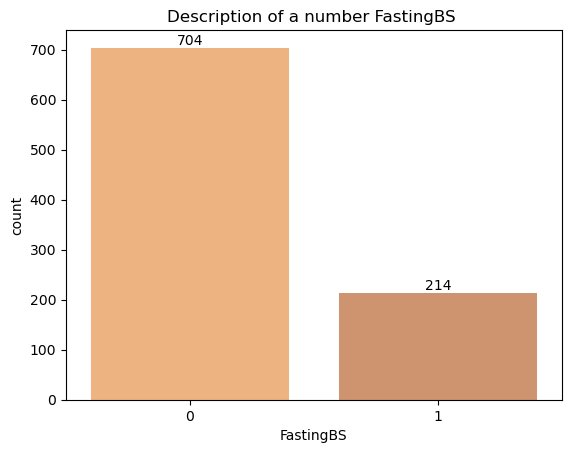

In [33]:
ax = sns.barplot(x=FastingBS_bar.index,y=FastingBS_bar.values,palette=colors)
for bar in ax.containers: 
    ax.bar_label(bar)
plt.xlabel('FastingBS')
plt.ylabel('count')
plt.title('Description of a number FastingBS ')
plt.show()

# RestingECG

In [34]:
RestingECG_bar = df['RestingECG'].value_counts()
RestingECG_bar

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

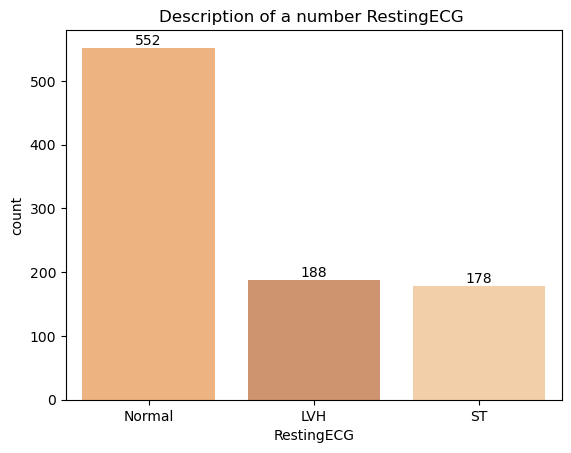

In [35]:
ax = sns.barplot(x=RestingECG_bar.index,y=RestingECG_bar.values,palette=colors)
for bar in ax.containers: 
    ax.bar_label(bar)
plt.xlabel('RestingECG')
plt.ylabel('count')
plt.title('Description of a number RestingECG ')
plt.show()

# ExerciseAngina

In [36]:
ExerciseAngina_bar = df['ExerciseAngina'].value_counts()
ExerciseAngina_bar

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

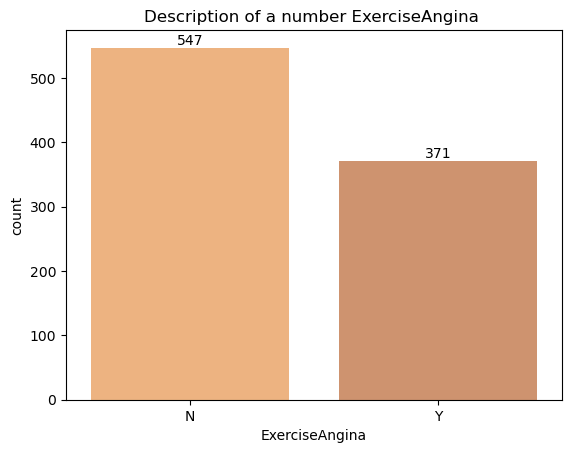

In [37]:
ax = sns.barplot(x=ExerciseAngina_bar.index,y=ExerciseAngina_bar.values,palette=colors)
for bar in ax.containers: 
    ax.bar_label(bar)
plt.xlabel('ExerciseAngina')
plt.ylabel('count')
plt.title('Description of a number ExerciseAngina ')
plt.show()

# ST_Slope

In [38]:
ST_Slope_bar = df['ST_Slope'].value_counts()
ST_Slope_bar

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

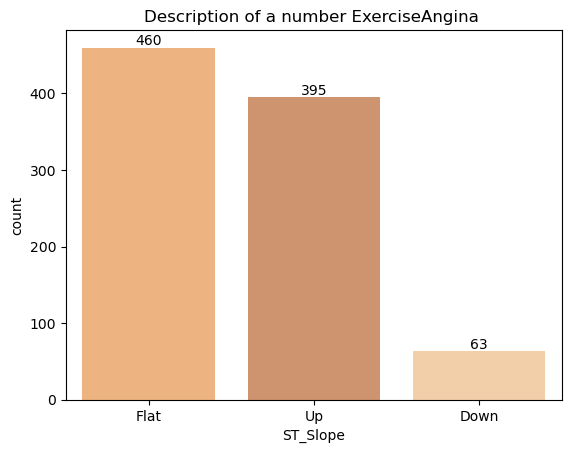

In [39]:
ax = sns.barplot(x=ST_Slope_bar.index,y=ST_Slope_bar.values,palette=colors)
for bar in ax.containers: 
    ax.bar_label(bar)
plt.xlabel('ST_Slope')
plt.ylabel('count')
plt.title('Description of a number ExerciseAngina ')
plt.show()

# The relationship of data to each other



### Sex Relationship with FastingBS and ChestPainType 

In [40]:
Sex_Relationship_with_FastingBS_and_ChestPainType = df.pivot_table(index='Sex',
    columns=['FastingBS','ChestPainType'],
    aggfunc= 'size',
    fill_value=0,)
Sex_Relationship_with_FastingBS_and_ChestPainType

FastingBS        0                 1            
ChestPainType  ASY ATA  NAP  TA  ASY ATA NAP  TA
Sex                                             
F               56  55   48   8   14   5   5   2
M              299  99  114  25  127  14  36  11

## Sex Relationship with RestingECG and ChestPainType 

In [41]:
Sex_Relationship_with_and_ChestPainType_RestingECG = Sex_Relationship_with_FastingBS_and_ChestPainType = df.pivot_table(index='Sex',
    columns=['ChestPainType','RestingECG'],
    aggfunc= 'size',
    fill_value=0,)
Sex_Relationship_with_and_ChestPainType_RestingECG

ChestPainType ASY             ATA            NAP             TA          
RestingECG    LVH Normal   ST LVH Normal  ST LVH Normal  ST LVH Normal ST
Sex                                                                      
F              22     38   10   9     42   9  15     31   7   1      7  2
M              80    246  100  14     81  18  32     92  26  15     15  6

### Sex Relationship with FastingBS and ChestPainType and RestingECG

In [42]:
Sex_Relationship_with_FastingBS_and_ChestPainType_RestingECG = Sex_Relationship_with_FastingBS_and_ChestPainType = df.pivot_table(index='Sex',
    columns=['FastingBS','ChestPainType','RestingECG'],
    aggfunc= 'size',
    fill_value=0,)
Sex_Relationship_with_FastingBS_and_ChestPainType_RestingECG

FastingBS       0                                               ...   1      \
ChestPainType ASY            ATA            NAP             TA  ... ASY ATA   
RestingECG    LVH Normal  ST LVH Normal  ST LVH Normal  ST LVH  ...  ST LVH   
Sex                                                             ...           
F              18     31   7   7     40   8  13     28   7   0  ...   3   2   
M              60    178  61  13     73  13  24     75  15  11  ...  39   1   

FastingBS                                             
ChestPainType           NAP             TA            
RestingECG    Normal ST LVH Normal  ST LVH Normal ST  
Sex                                                   
F                  2  1   2      3   0   1      1  0  
M                  8  5   8     17  11   4      5  2  

[2 rows x 24 columns]

## Sex Relationship with  and ChestPainType and  ExerciseAngina	

In [43]:
Sex_Relationship_with_and_ChestPainType_ExerciseAngina= Sex_Relationship_with_FastingBS_and_ChestPainType = df.pivot_table(index='Sex',
    columns=['ChestPainType','ExerciseAngina'],
    aggfunc= 'size',
    fill_value=0,)
Sex_Relationship_with_and_ChestPainType_ExerciseAngina

ChestPainType   ASY       ATA      NAP      TA   
ExerciseAngina    N    Y    N   Y    N   Y   N  Y
Sex                                              
F                37   33   55   5   48   5  10  0
M               162  264  101  12  104  46  30  6

## Sex Relationship with FastingBS and ChestPainType and RestingECG and ExerciseAngina

In [44]:
Sex_Relationship_with_FastingBS_and_ChestPainType_RestingECG_ExerciseAngina = Sex_Relationship_with_FastingBS_and_ChestPainType = df.pivot_table(index='Sex',
    columns=['FastingBS','ChestPainType','RestingECG','ExerciseAngina'],
    aggfunc= 'size',
    fill_value=0,)
Sex_Relationship_with_FastingBS_and_ChestPainType_RestingECG_ExerciseAngina

FastingBS        0                                           ...   1     \
ChestPainType  ASY                         ATA               ... NAP      
RestingECG     LVH     Normal       ST     LVH    Normal     ... LVH      
ExerciseAngina   N   Y      N    Y   N   Y   N  Y      N  Y  ...   N  Y   
Sex                                                          ...          
F               14   4     13   18   3   4   6  1     38  2  ...   2  0   
M               21  39     71  107  15  46  12  1     67  6  ...   4  4   

FastingBS                                        
ChestPainType                   TA               
RestingECG     Normal    ST    LVH Normal    ST  
ExerciseAngina      N  Y  N  Y   N      N  Y  N  
Sex                                              
F                   3  0  0  0   1      1  0  0  
M                  13  4  6  5   4      4  1  2  

[2 rows x 46 columns]

## Sex Relationship with  and ChestPainType and   ST_Slope

In [45]:
Sex_Relationship_with_and_ChestPainType_ST_Slope = Sex_Relationship_with_FastingBS_and_ChestPainType = df.pivot_table(index='Sex',
    columns=['ChestPainType','ST_Slope'],
    aggfunc= 'size',
    fill_value=0,)
Sex_Relationship_with_and_ChestPainType_ST_Slope

ChestPainType  ASY            ATA           NAP            TA         
ST_Slope      Down Flat   Up Down Flat  Up Down Flat  Up Down Flat  Up
Sex                                                                   
F                5   44   21    0   11  49    1   18  34    1    2   7
M               41  274  111    3   21  89    9   70  71    3   20  13

## Sex Relationship with FastingBS and ChestPainType and RestingECG and ExerciseAngina and ST_Slope
 

In [46]:
Sex_ST_Slope_Relationship_with_FastingBS_and_ChestPainType_RestingECG_ExerciseAngina = Sex_Relationship_with_FastingBS_and_ChestPainType = df.pivot_table(index=['Sex','ST_Slope'],
    columns=['FastingBS','ChestPainType','RestingECG','ExerciseAngina'],
    aggfunc= 'size',
    fill_value=0,)
Sex_ST_Slope_Relationship_with_FastingBS_and_ChestPainType_RestingECG_ExerciseAngina

FastingBS        0                                          ...   1            \
ChestPainType  ASY                        ATA               ... NAP             
RestingECG     LVH     Normal      ST     LVH    Normal     ... LVH    Normal   
ExerciseAngina   N   Y      N   Y   N   Y   N  Y      N  Y  ...   N  Y      N   
Sex ST_Slope                                                ...                 
F   Down         2   0      0   0   0   0   0  0      0  0  ...   0  0      0   
    Flat         7   4      5  16   0   4   4  0      5  2  ...   0  0      1   
    Up           5   0      8   2   3   0   2  1     33  0  ...   2  0      2   
M   Down         0   5      0  13   2   5   0  0      2  0  ...   1  0      1   
    Flat        10  25     36  84   3  31   3  1      6  3  ...   1  4      6   
    Up          11   9     35  10  10  10   9  0     59  3  ...   2  0      6   

FastingBS                                 
ChestPainType            TA               
RestingECG        ST    LVH Normal    ST  
ExerciseAngina  Y  N  Y   N      N  Y  N  
Sex ST_Slope                              
F   Down        0  0  0   0      0  0  0  
    Flat        0  0  0   0      1  0  0  
    Up          0  0  0   1      0  0  0  
M   Down        0  1  1   1      0  0  1  
    Flat        2  4  4   3      2  1  0  
    Up          2  1  0   0      2  0  1  

[6 rows x 46 columns]

<h3><center>result</center></h3>

1 - Men have the largest share of disease<br>

2 - It is clear that men have the largest share of ASY with 426 while women have 70. As for ATA for men, it is 113 and women 60. As for NAP for men, it is 150 and women 53. As for TA for men, it is 36 and women 10.<br>

3 - It is clear that the blood sugar level after fasting. Which is usually measured after a person fasts for a period ranging from 8 to 12 hours.
The men had a high normal level of 537, while those who had a high level had a high of 188
For women, the normal level is 167
I was the one who had a high level of 26<br>

4 - It is clear that men have the largest share in RestingECG, so it was 
The normal result is 434
 And ST-T wave abnormality is 150 
And left ventricular hypertrophy is 141
As for women 
The normal result was 118 
And ST-T wave abnormality is 28
and Left ventricular hypertrophy at 47<br>

5 - In the exercise angina test, it is an angina that occurs when the heart is unable to supply the body with adequate oxygen during activity or exercise.
I found that the men who do not have a chest pain score are 397, while those who have it are 328 
As for women, those who do not have angina have 150 and those who have 43. It is clear that men are more threatened by angina than women.<br>

6 - In analyzing the relationship of gender with ST_Slope 
It was found that in men 
Those in a normal state or with a low risk of heart disease, meaning (Up sloping) had the largest number at 284, while those in a non-severe ischemic state or an abnormal condition that may be worrying (Flat) had 385, while for Down it was 56.

As for women, they had the least number. up was 111
As for the case of flat 75 
And for Down 
7 only <br> 

7 - In analyzing the ChestPainType 
It was found that ASY was the largest number at 496 <br>

8 - Analysis of FastingBS 
The blood sugar level was found to be normal at 704
As for those who have a high blood sugar level after fasting, this may be an indication of diabetes or a pre-diabetic condition.
It reached 214 <br> 

9 - RestingECG analysis 
It was found that when the resting ECG was normal, it was 552 
But if there are abnormalities in the ST or T waves on the ECG (ST-T wave abnormality) with 178 
If there is an enlargement of the left ventricle of the heart. (Left ventricular hypertrophy) 188 <br>

10 - Analysis of ExerciseAngina 
It was found that the person suffers from angina pectoris during exercise. This may be a sign of blood vessel problems or poor blood flow to the heart 371 
As for those who do not suffer 547 <br>

11 - In analyzing the ST_Slope 
It has been found that a person's up sloping may indicate a normal condition or a decrease in the possibility of developing heart disease. It reached 395
Flat may indicate non-severe ischemia or an abnormal condition that may be worrying. 460 
Down sloping may indicate the presence of acute ischemia or myocardial infarction (heart attack). 63 <br>

<h3><center>Training stage</center></h3>


# Data  preprocessing

In [47]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [48]:
label = LabelEncoder()

In [49]:
df_object = df.select_dtypes(include='object')
df_nomric = df.select_dtypes(exclude='object')


In [50]:
for i in range(0,df_object.shape[1]):
    df_object.iloc[:,i] = label.fit_transform(df_object.iloc[:,i])

In [51]:
df = pd.concat([df_object,df_nomric],axis=1)

In [52]:
df.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1,1,1,0,2,40,140,289,0,172,0.0,0
1,0,2,1,0,1,49,160,180,0,156,1.0,1
2,1,1,2,0,2,37,130,283,0,98,0.0,0
3,0,0,1,1,1,48,138,214,0,108,1.5,1
4,1,2,1,0,2,54,150,195,0,122,0.0,0


In [53]:
df.shape

(918, 12)

<Axes: >

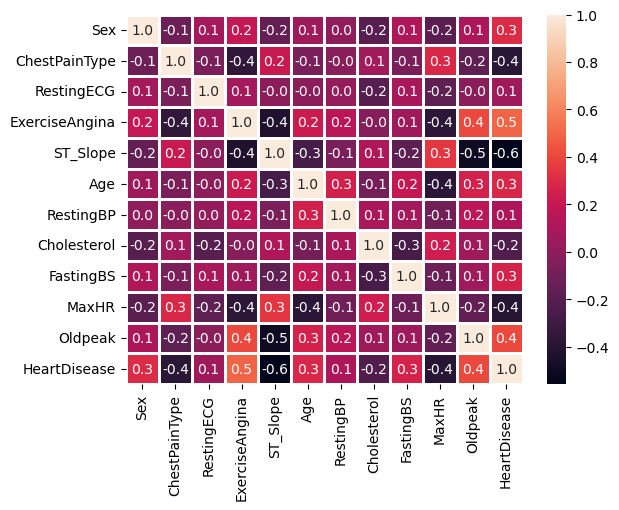

In [54]:
df_corr = df.corr()
sns.heatmap(df_corr,annot=True,fmt='.1f',linewidths=1)

In [55]:
scalar = MinMaxScaler()
df_scaled = scalar.fit_transform(df)


In [58]:
df = pd.DataFrame(df_scaled, columns=df.columns)

df

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1.0,0.333333,0.5,0.0,1.0,0.244898,0.70,0.479270,0.0,0.788732,0.295455,0.0
1,0.0,0.666667,0.5,0.0,0.5,0.428571,0.80,0.298507,0.0,0.676056,0.409091,1.0
2,1.0,0.333333,1.0,0.0,1.0,0.183673,0.65,0.469320,0.0,0.267606,0.295455,0.0
3,0.0,0.000000,0.5,1.0,0.5,0.408163,0.69,0.354892,0.0,0.338028,0.465909,1.0
4,1.0,0.666667,0.5,0.0,1.0,0.530612,0.75,0.323383,0.0,0.436620,0.295455,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,1.0,1.000000,0.5,0.0,0.5,0.346939,0.55,0.437811,0.0,0.507042,0.431818,1.0
914,1.0,0.000000,0.5,0.0,0.5,0.816327,0.72,0.320066,1.0,0.570423,0.681818,1.0
915,1.0,0.000000,0.5,1.0,0.5,0.591837,0.65,0.217247,0.0,0.387324,0.431818,1.0
916,0.0,0.333333,0.0,0.0,0.5,0.591837,0.65,0.391376,0.0,0.802817,0.295455,1.0


In [60]:
input_ = df.drop(['HeartDisease'],axis=1)
target = df['HeartDisease']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(input_, target, test_size=.2, random_state=42)

In [62]:
X_test.shape

(184, 11)

In [63]:
X_train.shape

(734, 11)

# moduling

In [136]:
lc = LogisticRegression()
svm_ = SVC(kernel='poly',C=1.0)
knn = KNeighborsClassifier()
ada = AdaBoostClassifier(n_estimators=90, learning_rate=1.0)
bagging = BaggingClassifier(n_estimators=70, max_samples=1.0, max_features=1.0)
extra = ExtraTreesClassifier(n_estimators=100, criterion='gini', max_depth=6)
Gradient = GradientBoostingClassifier(n_estimators=50)
dici = DecisionTreeClassifier()
random = RandomForestClassifier(n_estimators=200,  criterion='gini', max_depth=6, min_samples_split=2)
# voting = VotingClassifier()
xgb = XGBClassifier()
cat = CatBoostClassifier()
lgbm = LGBMClassifier()

In [139]:
def model (model_): 
    model_.fit(X_train, y_train) 
    y_pred = model_.predict(X_test)  
    
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {model_.score(X_train ,y_train)}")  
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    corr = confusion_matrix(y_test, y_pred)
    sns.heatmap(corr,annot=True,fmt='1.1f')
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

         0.0       0.78      0.88      0.83        77
         1.0       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Accuracy: 0.8555858310626703
Confusion Matrix:
[[68  9]
 [19 88]]
Accuracy Score: 0.8478260869565217


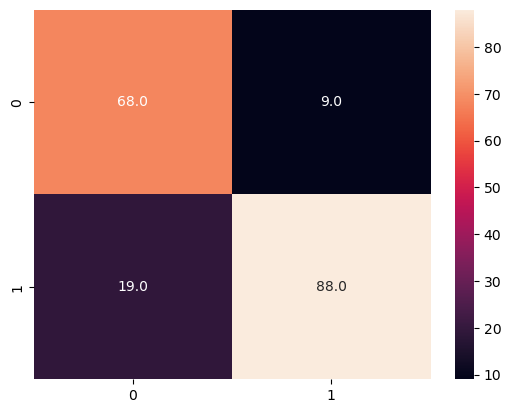

In [140]:
model(lc)

              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86        77
         1.0       0.92      0.86      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184

Accuracy: 0.888283378746594
Confusion Matrix:
[[69  8]
 [15 92]]
Accuracy Score: 0.875


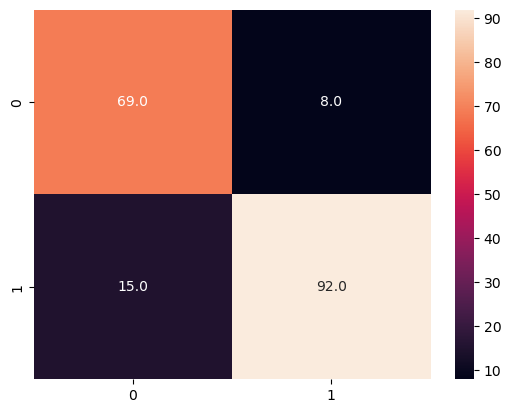

In [141]:
model(svm_)

              precision    recall  f1-score   support

         0.0       0.81      0.86      0.84        77
         1.0       0.89      0.86      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

Accuracy: 0.8787465940054496
Confusion Matrix:
[[66 11]
 [15 92]]
Accuracy Score: 0.8586956521739131


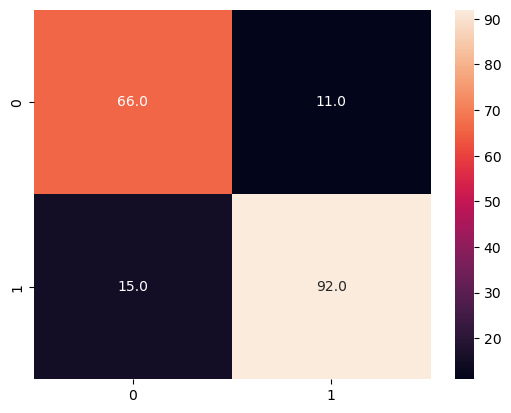

In [142]:
model(knn)

              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84        77
         1.0       0.91      0.84      0.87       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

Accuracy: 0.8896457765667575
Confusion Matrix:
[[68  9]
 [17 90]]
Accuracy Score: 0.8586956521739131


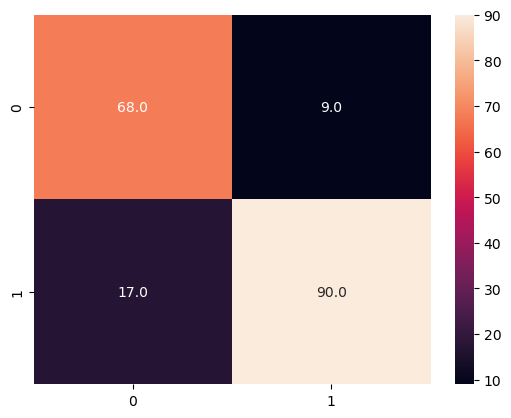

In [143]:
model(ada)


              precision    recall  f1-score   support

         0.0       0.83      0.88      0.86        77
         1.0       0.91      0.87      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184

Accuracy: 1.0
Confusion Matrix:
[[68  9]
 [14 93]]
Accuracy Score: 0.875


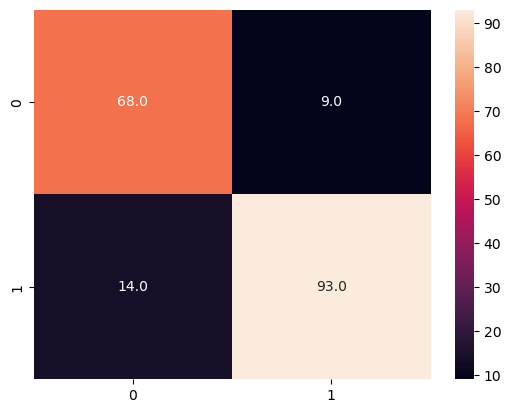

In [144]:
model(bagging)

              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86        77
         1.0       0.91      0.88      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

Accuracy: 0.896457765667575
Confusion Matrix:
[[68  9]
 [13 94]]
Accuracy Score: 0.8804347826086957


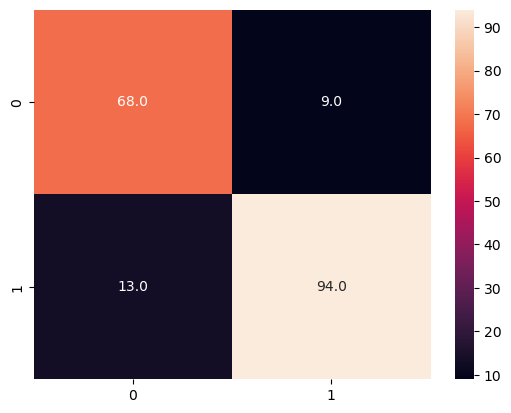

In [145]:
model(extra)

              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85        77
         1.0       0.91      0.86      0.88       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184

Accuracy: 0.9182561307901907
Confusion Matrix:
[[68  9]
 [15 92]]
Accuracy Score: 0.8695652173913043


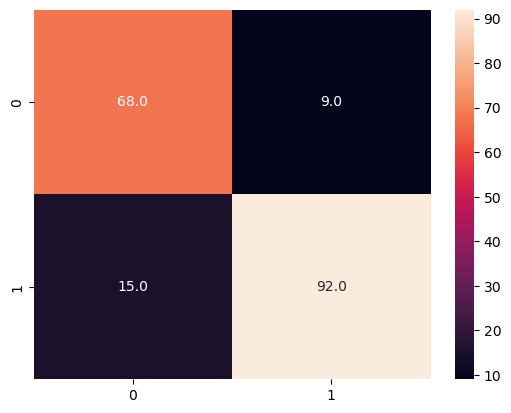

In [146]:
model(Gradient)

              precision    recall  f1-score   support

         0.0       0.74      0.83      0.78        77
         1.0       0.87      0.79      0.82       107

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.80      0.81       184

Accuracy: 1.0
Confusion Matrix:
[[64 13]
 [23 84]]
Accuracy Score: 0.8043478260869565


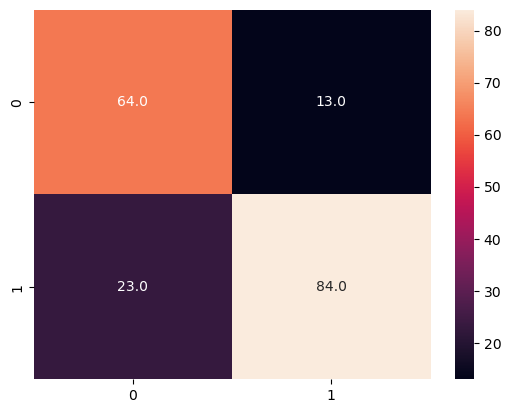

In [147]:
model(dici)

              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86        77
         1.0       0.90      0.89      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

Accuracy: 0.9223433242506812
Confusion Matrix:
[[67 10]
 [12 95]]
Accuracy Score: 0.8804347826086957


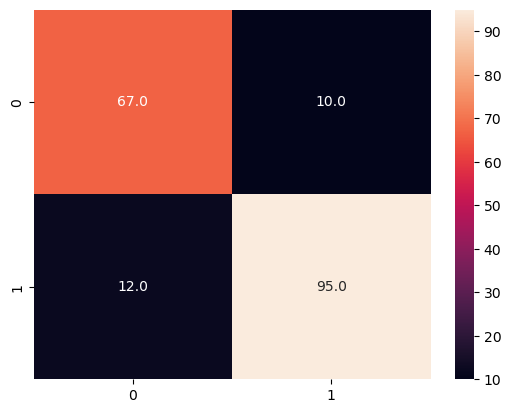

In [148]:
model(random)


Learning rate set to 0.009028
0:	learn: 0.6849548	total: 3.21ms	remaining: 3.21s
1:	learn: 0.6773315	total: 3.85ms	remaining: 1.92s
2:	learn: 0.6696376	total: 4.64ms	remaining: 1.54s
3:	learn: 0.6627133	total: 5.42ms	remaining: 1.35s
4:	learn: 0.6549176	total: 6.23ms	remaining: 1.24s
5:	learn: 0.6475050	total: 6.87ms	remaining: 1.14s
6:	learn: 0.6398777	total: 7.62ms	remaining: 1.08s
7:	learn: 0.6334919	total: 8.25ms	remaining: 1.02s
8:	learn: 0.6266514	total: 9.01ms	remaining: 992ms
9:	learn: 0.6197173	total: 9.79ms	remaining: 969ms
10:	learn: 0.6127402	total: 10.6ms	remaining: 955ms
11:	learn: 0.6062452	total: 11.4ms	remaining: 940ms
12:	learn: 0.6005401	total: 12.3ms	remaining: 931ms
13:	learn: 0.5937959	total: 13ms	remaining: 918ms
14:	learn: 0.5880995	total: 13.7ms	remaining: 898ms
15:	learn: 0.5816751	total: 14.8ms	remaining: 913ms
16:	learn: 0.5765107	total: 15.5ms	remaining: 895ms
17:	learn: 0.5702050	total: 16.1ms	remaining: 881ms
18:	learn: 0.5648173	total: 17.4ms	remaining: 

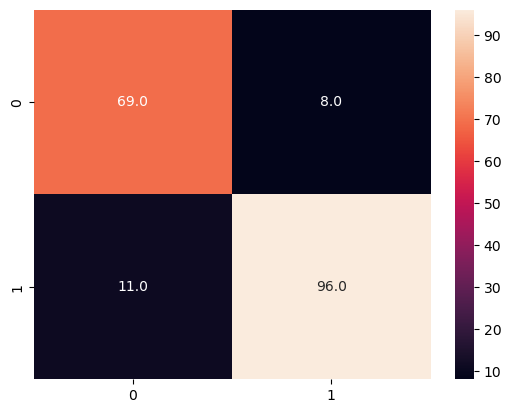

In [149]:
model(cat)

              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85        77
         1.0       0.92      0.85      0.88       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184

Accuracy: 1.0
Confusion Matrix:
[[69  8]
 [16 91]]
Accuracy Score: 0.8695652173913043


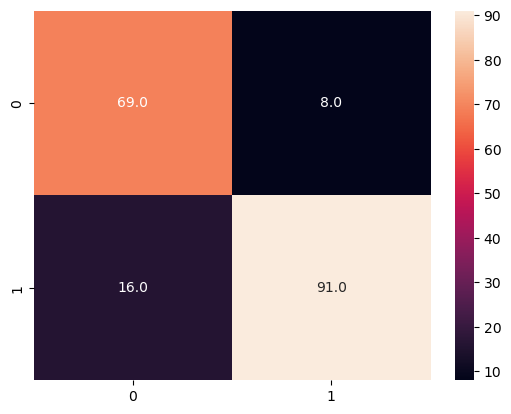

In [150]:
model(xgb)

[LightGBM] [Info] Number of positive: 401, number of negative: 333
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 358
[LightGBM] [Info] Number of data points in the train set: 734, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.546322 -> initscore=0.185819
[LightGBM] [Info] Start training from score 0.185819
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

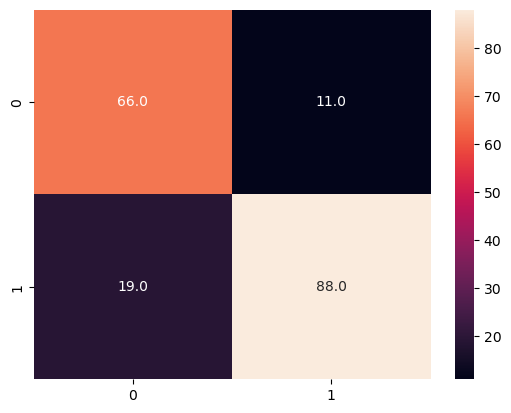

In [151]:
model(lgbm)

In [175]:
model = Sequential([
    Dense(128,activation='relu',input_dim =X_train.shape[1]),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),

    Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [176]:
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.6394 - loss: 0.6636
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.8203 - loss: 0.4620
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.8276 - loss: 0.4150
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.8248 - loss: 0.4145
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.8393 - loss: 0.3638
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.8659 - loss: 0.3363
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.8506 - loss: 0.3620
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.8482 - loss: 0.3540
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.8490 - loss: 0.3670
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.8452 - loss: 0.3464
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - accuracy: 0.8371 - loss: 0.3626
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step

In [177]:
model.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8766 - loss: 0.3506  


[0.3378762900829315, 0.8804348111152649]

In [178]:
model.save('HeartDisease.h5')